# Mission

I wish to implement Roland algorithm for rate change in 10 qubit system
The reason to choose 10 qubit system is that according to theory we should the T needed for linear time variation is $T\geq \frac{N}{\epsilon}$ and for [RC01] function we should have $T\geq \frac{\pi}{2\epsilon}\sqrt{N}$.

Setting $n=10$ gives us $N = 2^{10} = 1024 $ so so the we should have  $T\geq \frac{1024}{\epsilon}$ for the linear case and $T\geq \frac{pi}{2\epsilon}\sqrt{N}\approx\frac{50}{\epsilon}$ for [RC01] function.

As before we will use Grover search as the simulated algorithm.

In [1]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools
from importlib import reload 
from scipy.optimize import fsolve

running new rhs


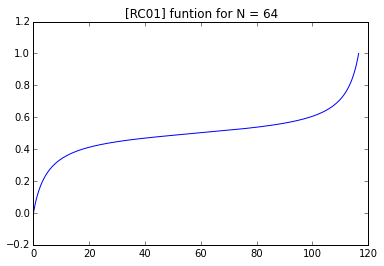

In [2]:
n = 6
N = 2**n
id_n = tensor([qeye(2)]*n)
psi0 = tensor([basis(2,0)]*n)
psi0= hadamard_transform(n)*psi0
H_0 = id_n-psi0*psi0.trans()
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H_0, psi0)
in_state = tensor([basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1),
#                    basis(2,0),basis(2,1),
#                    basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1)])

H_1 = id_n - in_state*in_state.trans()
#display(H_1)

h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]

epsilon = 0.1
steps = 1000
s_function = LH_tools.s_function
s_one = LH_tools.find_s_one (N, epsilon)
# Plot rolands function
plt.plot(np.linspace(0, s_one, steps),s_function(np.linspace(0, s_one, steps) , N, epsilon))
plt.title("[RC01] funtion for N = %s" % N);plt.show()

Computation time 53.544954776763916 seconds :
Numeric gap 	= 0.0328404212213 
Theoretical gap = 0.03125
Relative Error	= 0.0508934790826


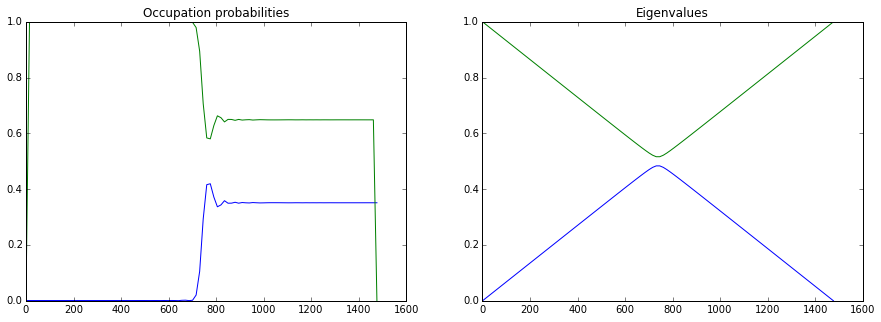

In [318]:
T = 1476
# Speed test
epsilon = 0.1
steps = 100
P_mat,EV_mat,time = LH_tools.benchmark(h_t, in_state, steps=100, T=T)
#Compare theoretical gap to numeric gap

th_gap = np.sqrt(1-4*(1-1/N)*1/4)
nu_gap = LH_tools.find_gap(evals_mat) 
print("Numeric gap \t= %s \nTheoretical gap = %s" %(nu_gap,th_gap))
print("Relative Error\t= %s" % (abs(nu_gap-th_gap)/th_gap))

Computation time 58.646148443222046 seconds :
Numeric gap 	= 0.0633078340238 
Theoretical gap = 0.03125
Relative Error	= 1.02585068876


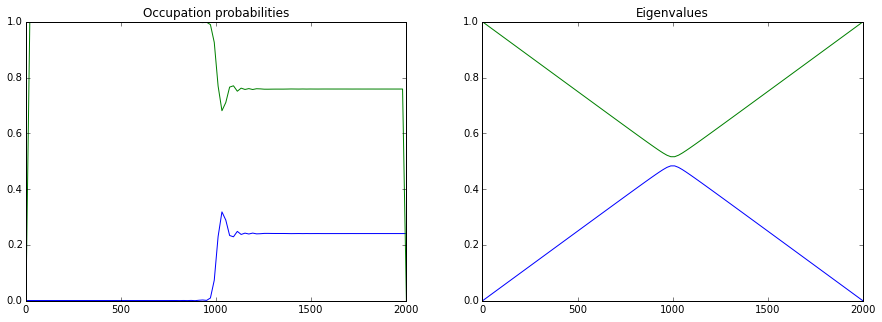

In [254]:
T = 2000
# Speed test
epsilon = 0.1
steps = 100
P_mat,EV_mat,time = LH_tools.benchmark(h_t, in_state, steps=100, T=T)
#Compare theoretical gap to numeric gap
N = 2**n
th_gap = np.sqrt(1-4*(1-1/N)*1/4)
nu_gap = LH_tools.find_gap(evals_mat) 
print("Numeric gap \t= %s \nTheoretical gap = %s" %(nu_gap,th_gap))
print("Relative Error\t= %s" % (abs(nu_gap-th_gap)/th_gap))

Computation time 23.662959337234497 seconds :
Numeric gap 	= 0.0373182113222 
Theoretical gap = 0.03125
Relative Error	= 0.194182762311


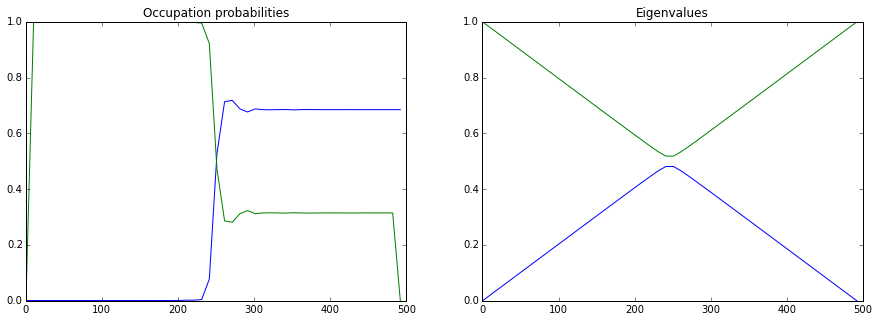

In [72]:
T = 492
# Speed test
epsilon = 0.1
steps = 50
P_mat,EV_mat,time = LH_tools.benchmark(h_t, in_state, steps, T=T)
#Compare theoretical gap to numeric gap
N = 2**n
th_gap = np.sqrt(1-4*(1-1/N)*1/4)
nu_gap = LH_tools.find_gap(EV_mat) 
print("Numeric gap \t= %s \nTheoretical gap = %s" %(nu_gap,th_gap))
print("Relative Error\t= %s" % (abs(nu_gap-th_gap)/th_gap))

# check if 1000 to 3000 is good range for  10 qubit system
if it is : run with jumps of 100 and send mail in the end

In [63]:
P_per_speed = []
evals_per_speed = []
for speed in range(1000,3000,100):
    tlist = np.linspace(0, speed, 100)
    args = {'t_max': max(tlist)}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
    P_per_speed.append(P_mat)
    evals_per_speed.append(evals_mat)

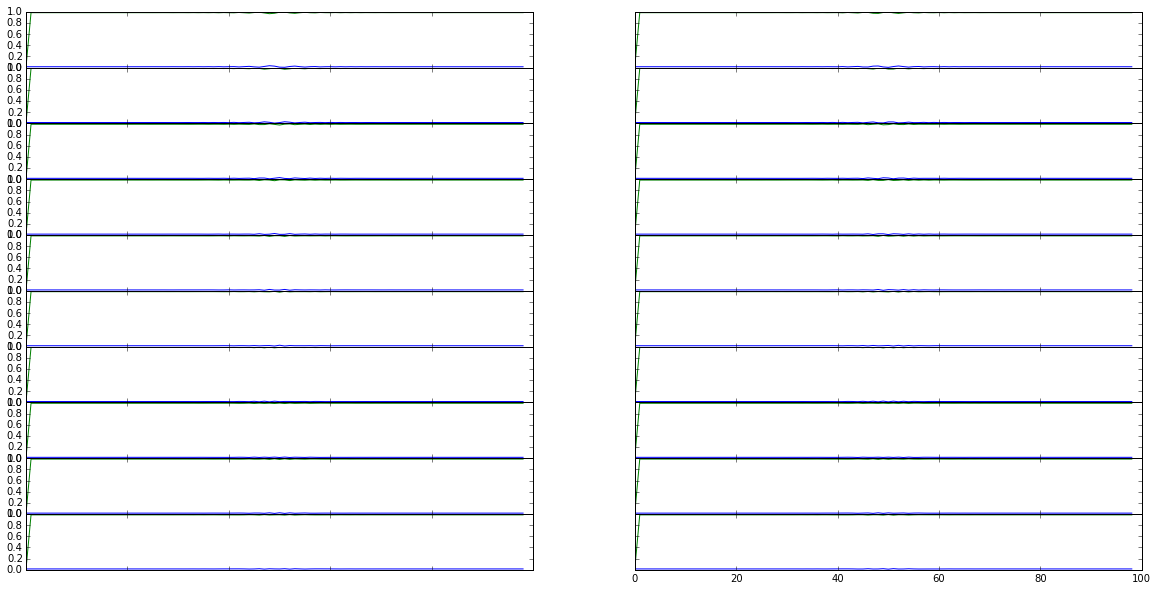

In [64]:
plotarr = []
speed = 0
f, plotarr = plt.subplots(10,2, sharex=True, sharey=True,figsize=(20,10))
try:
    for plot_group in plotarr:
        for plot in plot_group:
            plot.plot(P_per_speed[speed][:-1])
            speed+=1
except IndexError:
    pass # ignore
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(hspace=0)

plt.show()
# LH_tools.SendMail("Tests of 10 qubit using linear time",
#                  "From T = 1000 to T= 3000 with 100 jumps",
#                  f)

## Examining the behavior of a stretched RC01 function for longer time
We inspect the behavior when we let the stretch RC01 function to longer times


In [6]:
# To fix this we will try strectching the function.
def s_function2(t, rate = 1 ,N = 1024 , epsilon = 0.1 ):
    """Computes the rate function s(t) """
    t = t * rate
    nomerator = np.sqrt(N-1) * np.tan((2 * t * epsilon * np.sqrt(N-1)  - N * np.arctan(np.sqrt(N-1)))/ N)
    denominator = 1 - N
    return 1/2*(1 - nomerator / denominator)

def find_s_one2(s_function, rate =  1 , N = 1024, epsilon = 0.1):
    # We use hinge function to prevent negative solutions
    s_zero = lambda x: max(1 - s_function(x, rate, N , epsilon), 2-x)
    # Find closest solution to 0 for 1-s(t)=0
    return fsolve(s_zero,0)[0]

In [10]:
in_state

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1]], shape = [256, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]


In [15]:
options = Options()
options.nsteps = 1000
reload(LH_tools)


# h_t= [[H_0,'(t_max-t)/t_max'],
#       [H_1, 't/t_max']]
h_t= [[H_0,'1-t'],
      [H_1, 't']]


P_mats = []
EV_mats = []


for rate in (1, ):
    s_one = find_s_one2(s_function2, rate , N , epsilon)
    tlist = np.linspace(0, s_one, steps)
    slist = s_function2(tlist , rate, N, epsilon) * s_one
    args = {'t_max':s_one}
    P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False, options)
    P_mats.append(P_mat)
    EV_mats.append(EV_mat)
    LH_tools.plot_PandEV(P_mat, EV_mat,tlist)

/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/integrate/_ode.py:869: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [82]:
tlist

array([   0.        ,    0.11666829,    0.23333658,    0.35000488,
          0.46667317,    0.58334146,    0.70000975,    0.81667805,
          0.93334634,    1.05001463,    1.16668292,    1.28335122,
          1.40001951,    1.5166878 ,    1.63335609,    1.75002439,
          1.86669268,    1.98336097,    2.10002926,    2.21669756,
          2.33336585,    2.45003414,    2.56670243,    2.68337073,
          2.80003902,    2.91670731,    3.0333756 ,    3.1500439 ,
          3.26671219,    3.38338048,    3.50004877,    3.61671707,
          3.73338536,    3.85005365,    3.96672194,    4.08339024,
          4.20005853,    4.31672682,    4.43339511,    4.55006341,
          4.6667317 ,    4.78339999,    4.90006828,    5.01673658,
          5.13340487,    5.25007316,    5.36674145,    5.48340974,
          5.60007804,    5.71674633,    5.83341462,    5.95008291,
          6.06675121,    6.1834195 ,    6.30008779,    6.41675608,
          6.53342438,    6.65009267,    6.76676096,    6.88342

It can be seen that given time stretch up to 10 times longer process, we decrease the crossing probability, however this results does not appear to be any better then the one we got in the linear simulation.

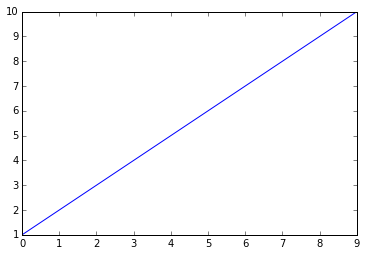

In [51]:
dummy = plt.figure()
plt.plot(np.linspace(1,10,10))
LH_tools.SendMail("Done RC01 sweep","Done",f)

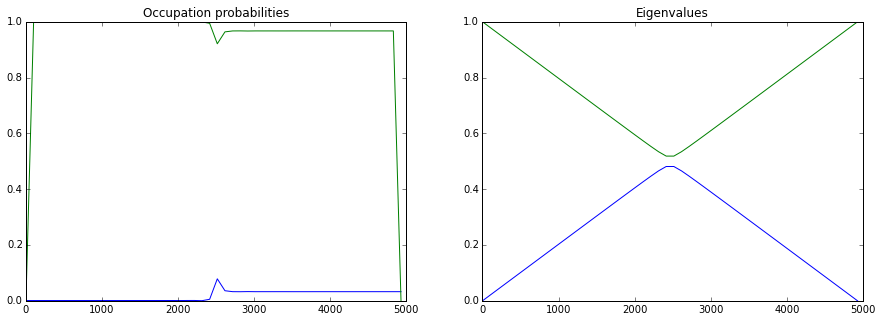

In [83]:
options = Options()
options.nsteps = 100000
steps= 50
epsilon = 0.1
s_one = find_s_one (s_function, N, epsilon)
tlist = np.linspace(0, s_one, steps)

# slist = s_function(np.linspace(0, s_one, steps) , N, epsilon) * s_one
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
args = {'t_max':s_one}
P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args ,in_state, False,options)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
plt.show()
# LH_tools.SendMail("High nstepes for small epsilon",
#                  """options = Options()
# options.nsteps = 100000
# steps= 50
# epsilon = 0.01
# s_one = find_s_one (s_function, N, epsilon)
# tlist = np.linspace(0, s_one, steps)

# slist = s_function(np.linspace(0, s_one, steps) , N, epsilon) * s_one
# h_t= [[H_0,'(t_max-t)/t_max'],
#       [H_1, 't/t_max']]
# args = {'t_max':s_one}
# P_mat,EV_mat = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False,options)
# f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)
# plt.show()
#                  """,
#                  f)

In [14]:
max(tlist)

116.5516241495543

# compare to end of Untitled.npyb

> /home/oryonatan/qutip/LH_tools.py(161)simulate_adiabatic_process2()
-> output = qutip.sesolve(H=h_t,
(Pdb) c


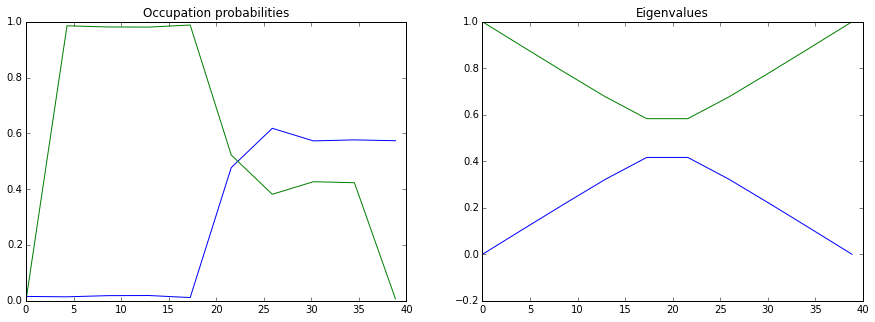

In [3]:
reload(LH_tools)
eps = 0.3
s = lambda t : LH_tools.s_function(t,N,eps)
tmax = LH_tools.find_s_one(N,eps)
tlist = np.linspace(0, tmax , 10)

#linear
slist = s_function(np.linspace(0, s_one, steps) , N, epsilon) * s_one
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]
args = {'t_max':tmax}
P_mat,EV_mat,_ = LH_tools.simulate_adiabatic_process2(tlist, h_t, args ,in_state, False)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)

# nomerator = 1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))
plt.show()

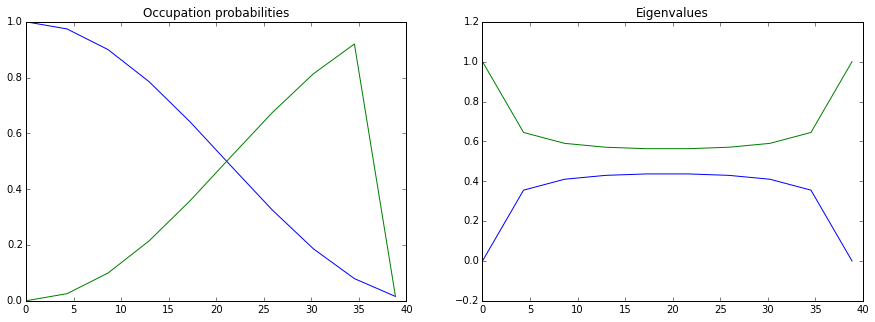

In [21]:
reload(LH_tools)

#roland
h_t= [[H_0,'1-1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))'],
      [H_1, '1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))']]
args = {'t_max':tmax, 'N':N, 'epsilon': eps}
in_state = Qobj.evaluate(h_t,0,args).eigenstates(eigvals=1)[1][0]
args = {'t_max':tmax, 'N':N, 'epsilon': eps}

P_mat,EV_mat,psis_qutip = LH_tools.simulate_adiabatic_process2(tlist, h_t, args ,in_state, False)
f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)

In [50]:
Qobj.evaluate(h_t,tlist[0],)*psis_qutip[0]

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1]], shape = [64, 1], type = ket
Qobj data =
[[-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]
 [-0.125]]

In [58]:
args = {'t_max':tmax, 'N':N, 'epsilon': eps}

propagator(h_t,tlist,[],args)

[Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = [64, 64], type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0. ...,  0.  0.  0.]
  [ 0.  1.  0. ...,  0.  0.  0.]
  [ 0.  0.  1. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 0.  0.  0. ...,  0.  0.  1.]],
 Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = [64, 64], type = oper, isherm = False
 Qobj data =
 [[-0.36376854+0.90832515j  0.02164716-0.01441786j  0.02164716-0.01441786j
   ...,  0.02164716-0.01441786j  0.02164716-0.01441786j
    0.02164716-0.01441786j]
  [ 0.02164716-0.01441786j -0.36376854+0.90832515j  0.02164716-0.01441786j
   ...,  0.02164716-0.01441786j  0.02164716-0.01441786j
    0.02164716-0.01441786j]
  [ 0.02164716-0.01441786j  0.02164716-0.01441786j -0.36376854+0.90832515j
   ...,  0.02164716-0.01441786j  0.02164716-0.01441786j
    0.02164716-0.01441786j]
  ..., 
  [ 0.02164716-0.01441786j  0.02164716-0.01441786j  0.0216

In [67]:
from scipy.linalg import expm
Qobj(expm((tlist[1]-tlist[0])*1j*Qobj.evaluate(h_t,tlist[1],args).data))

/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:243: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:161: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


Quantum object: dims = [[64], [64]], shape = [64, 64], type = oper, isherm = False
Qobj data =
[[-0.37994099-0.89305167j  0.00547829+0.02968989j  0.00547829+0.02968989j
  ...,  0.00547829+0.02968989j  0.00547829+0.02968989j
   0.00547829+0.02968989j]
 [ 0.00547829+0.02968989j -0.37994099-0.89305167j  0.00547829+0.02968989j
  ...,  0.00547829+0.02968989j  0.00547829+0.02968989j
   0.00547829+0.02968989j]
 [ 0.00547829+0.02968989j  0.00547829+0.02968989j -0.37994099-0.89305167j
  ...,  0.00547829+0.02968989j  0.00547829+0.02968989j
   0.00547829+0.02968989j]
 ..., 
 [ 0.00547829+0.02968989j  0.00547829+0.02968989j  0.00547829+0.02968989j
  ..., -0.37994099-0.89305167j  0.00547829+0.02968989j
   0.00547829+0.02968989j]
 [ 0.00547829+0.02968989j  0.00547829+0.02968989j  0.00547829+0.02968989j
  ...,  0.00547829+0.02968989j -0.37994099-0.89305167j
   0.00547829+0.02968989j]
 [ 0.00547829+0.02968989j  0.00547829+0.02968989j  0.00547829+0.02968989j
  ...,  0.00547829+0.02968989j  0.00547829+0

<64x64 sparse matrix of type '<class 'numpy.complex128'>'
	with 4096 stored elements in Compressed Sparse Row format>

## Speed test - expm vs propagator

In [122]:
A = np.random.rand(1024,1024)
Q = Qobj(A)

In [109]:
n = 10
N = 2**n
id_n = tensor([qeye(2)]*n)
psi0 = tensor([basis(2,0)]*n)
psi0= hadamard_transform(n)*psi0
H_0 = id_n-psi0*psi0.trans()
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H_0, psi0)
in_state = tensor([basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1),
                   basis(2,0),basis(2,1)])

H_1 = id_n - in_state*in_state.trans()
h_t= [[H_0,'1-1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))'],
      [H_1, '1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))']]
#display(H_1)
args = {'t_max':tmax, 'N':N, 'epsilon': eps}
tlist = np.linspace(0,1,15)
A = Qobj.evaluate(h_t,tlist[0],args)
As = [Qobj.evaluate(h_t,tlist[t],args)  for t in range(len(tlist))]

In [110]:
[Qobj(expm(-A.data*1j*1)) for A in As]
pass

/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:243: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/oryonatan/anaconda3/envs/qutip/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:161: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


In [126]:
args = {'t_max':tmax, 'N':N, 'epsilon': eps}

propagator(h_t,tlist,[],args)
pass

Propagator is much slower !


# check new github commit

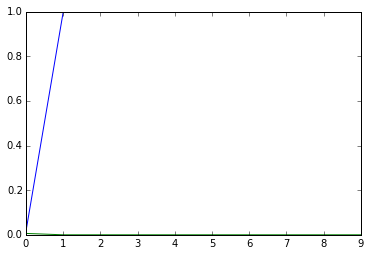

In [20]:
reload(LH_tools)
eps = 0.3
s = lambda t : LH_tools.s_function(t,N,eps)
tmax = LH_tools.find_s_one(N,eps)
tlist = np.linspace(0, tmax , 10)

#linear
slist = s_function(tlist , N, epsilon) * tmax
h_t= [[H_0,'(1-t)/t_max'],
      [H_1, 't/t_max']]
args = {'t_max':tmax}
P_mat,EV_mat,_ = LH_tools.simulate_adiabatic_process2(slist, h_t, args ,in_state, False)
# f = LH_tools.plot_PandEV(P_mat,EV_mat,tlist)

# nomerator = 1/2*(1-(np.sqrt(N - 1) * np.tan((2 * t * epsilon * np.sqrt(N - 1) - N * np.arctan(np.sqrt(N - 1))) / N))/(1-N))
plt.plot(P_mat)

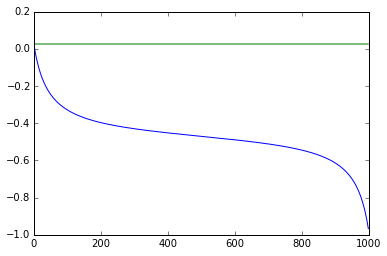

In [20]:
plt.plot(EV_mat)